In [10]:
import pandas as pd
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display

In [11]:
df_global = pd.read_csv('full-data/life-expectancy.csv')
df_global = df_global.rename(columns={'Life expectancy at birth (historical)': 'Expectancy'})
df_global

,Entity,Code,Year,Expectancy
0,Afghanistan,AFG,1950,27.7
1,Afghanistan,AFG,1951,28.0
2,Afghanistan,AFG,1952,28.4
3,Afghanistan,AFG,1953,28.9
4,Afghanistan,AFG,1954,29.2
...,...,...,...,...
20444,Zimbabwe,ZWE,2017,60.7
20445,Zimbabwe,ZWE,2018,61.4
20446,Zimbabwe,ZWE,2019,61.3
20447,Zimbabwe,ZWE,2020,61.1


In [12]:
continent_list_tmp = ['Asia', 'Africa', 'Europe', 'Oceania', 'Americas', 'World']

In [13]:
df_continents = df_global[df_global['Entity'].isin(continent_list_tmp)]
df_countries = df_global[~df_global['Entity'].isin(continent_list_tmp)]

In [14]:
all_year_tmp = sorted(df_continents.Year.unique())
all_text_tmp = ['All', 'Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'World']

In [15]:
def show_line_chart_continents(year, text):
    faded_color = '#EEEEEE'
    small_grouped_df = df_continents.groupby('Entity')
    fig = plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(1,1,1)
    x_labels_temp = [1770, 1800, 1850, 1900, 1950, 2000, 2021]
    x_labels_official = []
    for i in x_labels_temp:
        if i <= year - 20:
            x_labels_official.append(i)
    if year not in x_labels_official:
        x_labels_official.append(year)
    y_labels = [30, 40, 50, 60, 70, 80]
    colors = {'Africa':'#D1AFE4', 'Americas':'#2587F0', 'Asia':'#21DA61', 'Europe':'#E9C213', 'Oceania':'#F791C1', 'World':'#EB3E12'}
    if text != 'All':
        for i in colors.keys():
            if i != text:
                colors[i] = faded_color
    x_save, y_save = -1, -1
    save_key = None
    for key, df_local in small_grouped_df:
        tmp = df_local.loc[df_local['Year'] <= year, ['Year', 'Expectancy']]
        x = tmp.Year.values
        y = tmp.Expectancy.values
        if text == 'All':
            ax1.plot(x, y, '.-', color=colors[key], label=key)
        else:
            if key == text:
                save_key = key
                x_save = x
                y_save = y
            else:
                ax1.plot(x, y, '.-', color=colors[key])
    if save_key is not None:
        ax1.plot(x_save, y_save, '.-', color=colors[save_key], label=save_key)
    # set up plot
    ax1.set_title("Life expectancy, từ năm 1770 đến năm " + str(year))
    ax1.set_xticks(x_labels_official)
    ax1.set_yticks(y_labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    y_ticks = ax1.get_yticks()
    for y_tick in y_ticks:
        ax1.axhline(y=y_tick, color='#E7FCFB', linestyle='--', zorder=-1)
    plt.xlabel("Năm")
    plt.ylabel("Life expectancy")
    plt.legend(loc = "upper left")
    plt.show()

In [16]:
# Create the animation widget
animation3 = ipywidgets.interact(show_line_chart_continents, 
                                 year=ipywidgets.SelectionSlider(description='Year',   options=all_year_tmp), 
                                 text=ipywidgets.Combobox(value='All', options=all_text_tmp, description='Mode:', ensure_option=True,disabled=False))
# Set the interval time between frames to 100 milliseconds
animation3.interval = 0.01
# Display the animation widget
display(animation3)

interactive(children=(SelectionSlider(description='Year', options=(1770, 1800, 1820, 1830, 1850, 1870, 1885, 1…

<function __main__.show_line_chart_continents(year, text)>

In [17]:
def show_world_map_countries_tmp():
    print('White color = No data')
    small_df = df_countries.copy()
    small_df = small_df.sort_values(by=['Year'])
    # Create a choropleth map using Plotly Express
    fig = px.choropleth(small_df, locations='Code', color='Expectancy', hover_name='Entity',
                        color_continuous_scale='turbo', animation_frame='Year', range_color = [30, 90],
                        width=1000, height=800, projection='miller', template='plotly_white',
                        labels={'Life_exp': 'Years'})

    # Set the title and the speed of the chart
    fig.update_layout(title='Life Expectancy trên toàn cầu từ thế kỷ 16 đến nay')
    fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 20
    fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10
    
    # Show the chart
    fig.show()

White color = No data


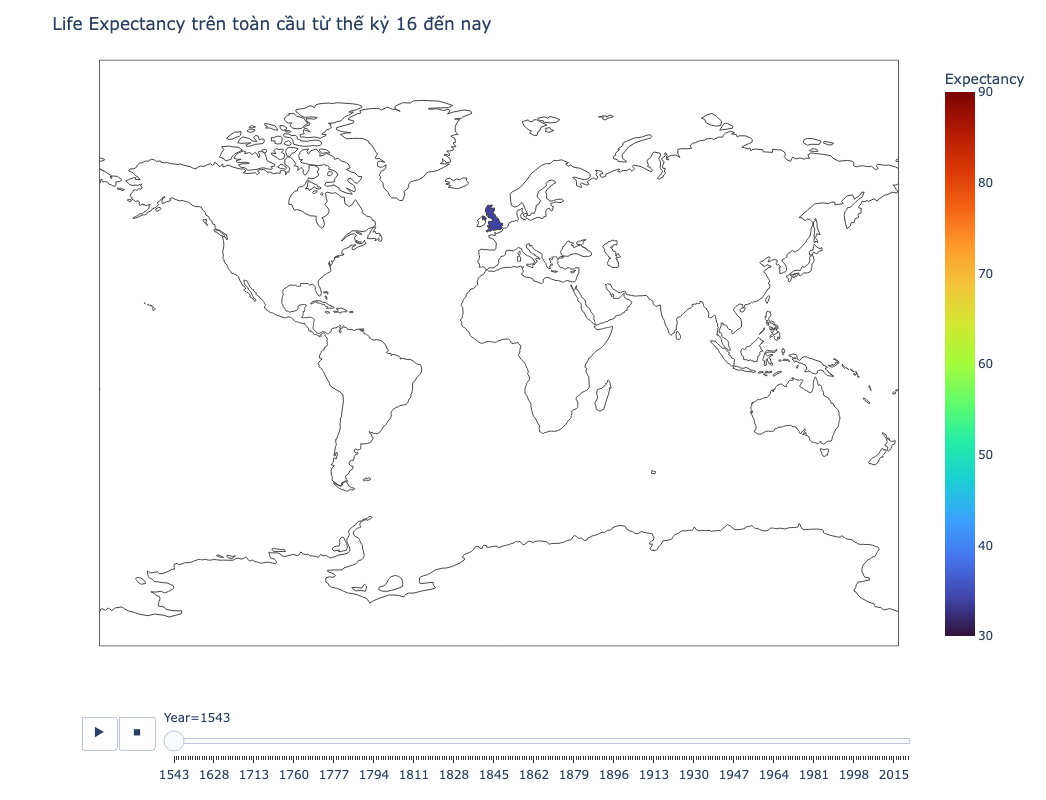

In [18]:
# if you don't see the map, re-run this cell or this notebook.
show_world_map_countries_tmp()